In [1]:
from dpks.quant_matrix import QuantMatrix
import numpy as np
import seaborn as sns

In [2]:
norm_method = "mean"

normalized_data = []

quant_matrix = QuantMatrix(
    quantification_file="../tests/input_files/de_matrix.tsv",
    design_matrix_file="../tests/input_files/de_design_matrix.tsv"
)

compared_data = (
    quant_matrix
        .filter()
        .normalize(
            method=norm_method,
            log_transform=True,
            use_rt_sliding_window_filter=True,
            window_length=100,
            stride=1
        )
        .quantify(method="top_n", top_n=1)
        .compare_groups(
            method="linregress",
            group_a=4,
            group_b=6,
            min_samples_per_group=2,
            level="protein",
            multiple_testing_correction_method="fdr_tsbh"
        )
)

compared_data.row_annotations["Species"] = np.where(compared_data.row_annotations["Protein"].str.contains("MOUSE"), "MOUSE",
                        np.where(compared_data.row_annotations["Protein"].str.contains("YEAST"), "YEAST",
                        np.where(compared_data.row_annotations["Protein"].str.contains("RT"), "RT", "NONE")))


normalized_data.append(compared_data)



/home/aaron/projects/dpks/dpks/dpks/normalization.py:109: RuntimeWarning: Mean of empty slice
  sample_means = np.nanmean(X, axis=0)


In [3]:
quant_matrix = QuantMatrix(
    quantification_file="../tests/input_files/de_matrix.tsv",
    design_matrix_file="../tests/input_files/de_design_matrix.tsv"
)

compared_data = (
    quant_matrix
        .filter()
        .normalize(
            method=norm_method,
            log_transform=True,
            use_rt_sliding_window_filter=False,
        )
        .quantify(method="top_n", top_n=1)
        .compare_groups(
            method="linregress",
            group_a=4,
            group_b=6,
            min_samples_per_group=2,
            level="protein",
            multiple_testing_correction_method="fdr_tsbh"
        )
)

compared_data.row_annotations["Species"] = np.where(compared_data.row_annotations["Protein"].str.contains("MOUSE"), "MOUSE",
                        np.where(compared_data.row_annotations["Protein"].str.contains("YEAST"), "YEAST",
                        np.where(compared_data.row_annotations["Protein"].str.contains("RT"), "RT", "NONE")))


normalized_data.append(compared_data)

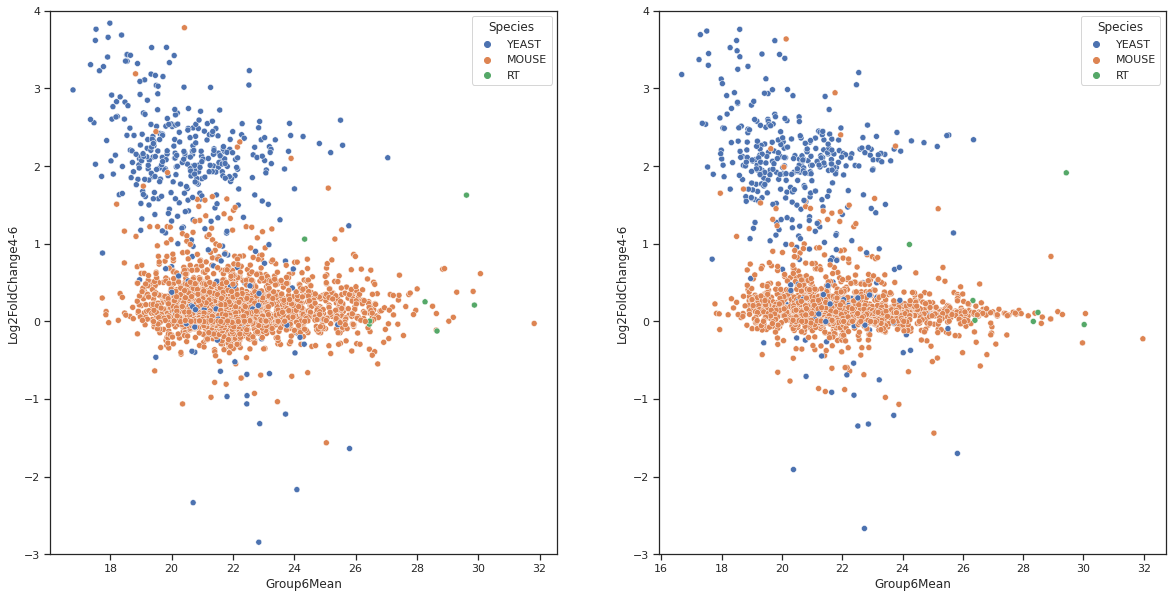

In [4]:
from matplotlib import gridspec
import matplotlib.pyplot as plt

sns.set(font_scale=1, style="ticks")

fig = plt.figure()

gs = gridspec.GridSpec(
    1, 2,
    width_ratios=[1, 1]
)

ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])


sns.scatterplot(
    data=normalized_data[0].row_annotations,
    x="Group6Mean",
    y="Log2FoldChange4-6",
    hue="Species",
    ax=ax1
)

sns.scatterplot(
    data=normalized_data[1].row_annotations,
    x="Group6Mean",
    y="Log2FoldChange4-6",
    hue="Species",
    ax=ax2
)


ax1.set(ylim=(-3, 4))
ax2.set(ylim=(-3, 4))

fig.figure.set_size_inches(20, 10)

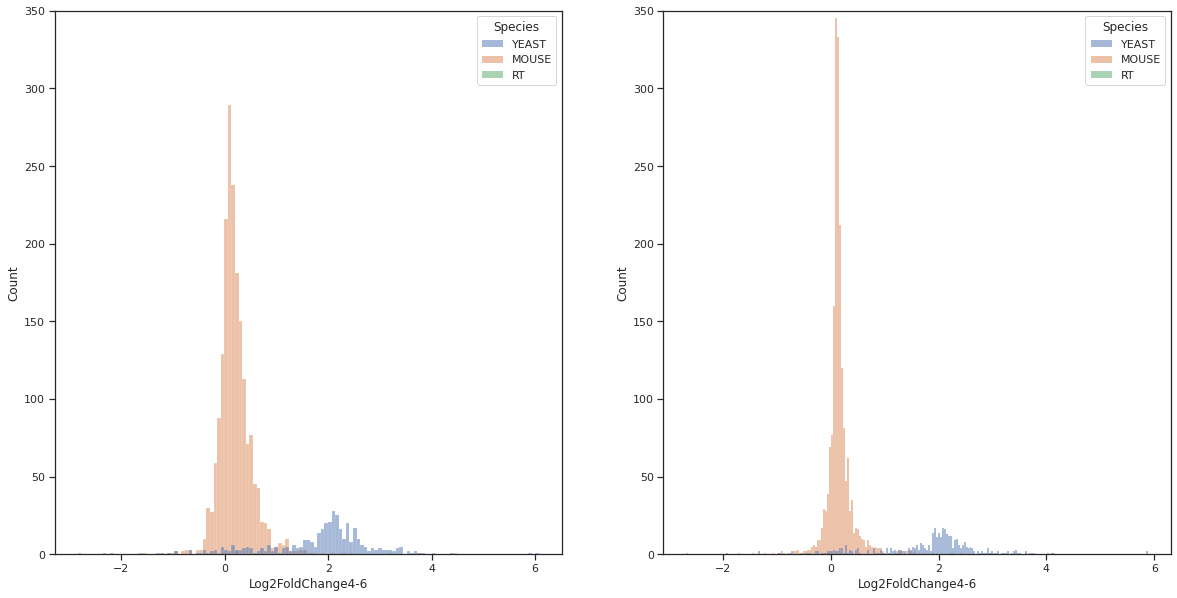

In [5]:
from matplotlib import gridspec
import matplotlib.pyplot as plt

sns.set(font_scale=1, style="ticks")

fig = plt.figure()

gs = gridspec.GridSpec(
    1, 2,
    width_ratios=[1, 1]
)

ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])


sns.histplot(
    data=normalized_data[0].row_annotations,
    x="Log2FoldChange4-6",
    hue="Species",
    ax=ax1
)

sns.histplot(
    data=normalized_data[1].row_annotations,
    x="Log2FoldChange4-6",
    hue="Species",
    ax=ax2
)


ax1.set(ylim=(0,350))
ax2.set(ylim=(0,350))

fig.figure.set_size_inches(20, 10)